In [1]:
#California Housing Dataset
#import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [2]:
california=fetch_california_housing()
data=pd.DataFrame(california.data,columns=california.feature_names)
data['MedHouseVal']=california.target
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [3]:
data.isnull().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

In [7]:
X=data.drop('MedHouseVal',axis=1)
y=data['MedHouseVal']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

import pickle
# Save the model
with open('californiaHousing_model.pkl', 'wb') as file:
    pickle.dump(model,file)


In [5]:
models={
    'Linear Regression':LinearRegression(),
    'Ridge Regression':Ridge(alpha=1.0),
    'Lasso Regression':Lasso(alpha=0.1),
    'Decision Tree':DecisionTreeRegressor(max_depth=5),
    'Random Forest':RandomForestRegressor(n_estimators=100),
}

results=pd.DataFrame(columns=['Model','MSE','MAE','R2 score'])
result1=[]
for model_name,model in models.items():
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    mse=mean_squared_error(y_test,y_pred)
    mae=mean_absolute_error(y_test,y_pred)
    r2=r2_score(y_test,y_pred)

    result1.append({
        'Model':model_name,
        'MSE':mse,
        'MAE':mae,
        'R2 score':r2
    })
results=pd.DataFrame(result1)
results

,Model,MSE,MAE,R2 score
0,Linear Regression,0.555892,0.533200,0.575788
1,Ridge Regression,0.555803,0.533204,0.575855
2,Lasso Regression,0.613512,0.581607,0.531817
3,Decision Tree,0.524515,0.522259,0.599732
4,Random Forest,0.253421,0.327032,0.806610


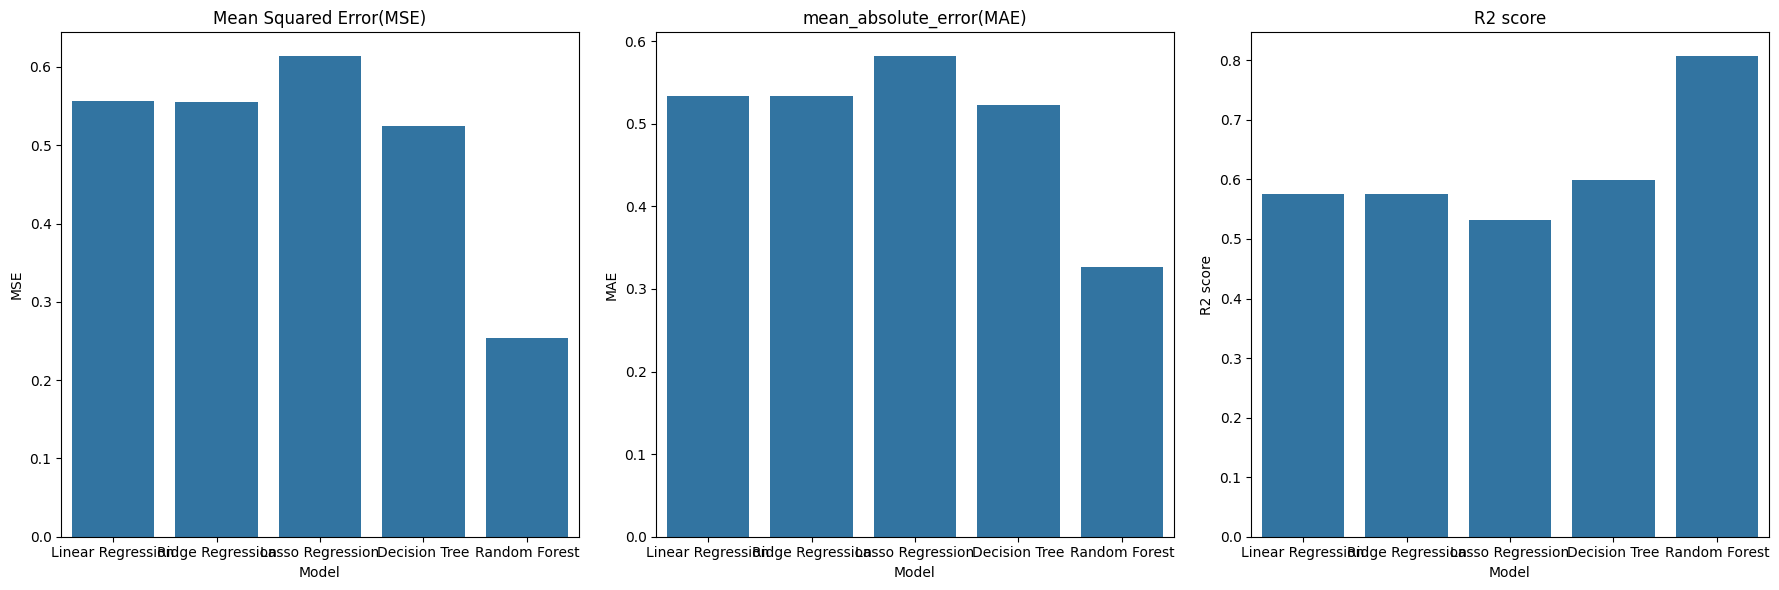

In [6]:
fig,axes=plt.subplots(nrows=1,ncols=3,figsize=(18,6))
sns.barplot(x='Model',y='MSE',data=results,ax=axes[0])
axes[0].set_title('Mean Squared Error(MSE)')
axes[0].set_xlabel('Model')
axes[0].set_ylabel('MSE')

sns.barplot(x='Model',y='MAE',data=results,ax=axes[1])
axes[1].set_title('mean_absolute_error(MAE)')
axes[1].set_xlabel('Model')
axes[1].set_ylabel('MAE')

sns.barplot(x='Model',y='R2 score',data=results,ax=axes[2])
axes[2].set_title('R2 score')
axes[2].set_xlabel('Model')
axes[2].set_ylabel('R2 score')

plt.tight_layout()
plt.show()

In [14]:

import pickle
import numpy as np

def infer_california_housing(model_path, input_features):
    """
    Perform inferencing on the California housing regression model.

    Parameters:
    - model_path (str): Path to the saved regression model pickle file.
    - input_features (list): List of input features (same order as used for training):
      [MedInc, HouseAge, AveRooms, AveBedrms, Population, AveOccup, Latitude, Longitude]

    Returns:
    - float: Predicted median house value.
    """
    try:
        # Load the trained regression model
        with open(r'C:\Users\IICET 20\Desktop\Simra kazi\Machine Learning\Regression\californiaHousing_model.pkl', 'rb') as file:
            model = pickle.load(file)

        # Ensure the input features are in the correct format
        input_array = np.array([input_features]).reshape(1, -1)

        # Predict median house value
        prediction = model.predict(input_array)[0]

        return prediction

    except Exception as e:
        return f"An error occurred: {e}"



In [15]:
# Example input: Replace with actual feature values
input_features = [8.3252, 41.0, 6.984127, 1.023810, 322.0, 2.555556, 37.88, -122.23]

# Path to your saved model
model_path = 'californiaHousing_model.pkl'

# Perform inference
predicted_value = infer_california_housing(model_path, input_features)
print(f"Predicted Median House Value: {predicted_value}")



Predicted Median House Value: 4.358713599999999


c:\Users\IICET 20\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
